## Identifying missing values

In [5]:
import pandas as pd
from io import StringIO

In [8]:
csv_data = '''A,B,C,D
1,2,3,4
5,6,,8
10,11,12,'''
csv_data = unicode(csv_data)

In [12]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [14]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## Eliminating samples or features with missing values

In [17]:
df.dropna(axis=0)

,A,B,C,D
0,1,2,3.0,4.0


In [19]:
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,10,11


In [26]:
# drop rows where all the columns values are NULL
df.dropna(axis = 0,how="all")

,A,B,C,D
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [23]:
# drop rows which has less than 4 values present
df.dropna(axis=0,thresh=4)

,A,B,C,D
0,1,2,3.0,4.0


In [27]:
#drop rows only where NULL is present in column C
df.dropna(axis=0,subset=['C'])

,A,B,C,D
0,1,2,3.0,4.0
2,10,11,12.0,NaN


## Imputation of missing values

In [35]:
from sklearn.preprocessing import Imputer

In [38]:
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Handling categorical data

In [59]:
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [60]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}

In [64]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [68]:
import numpy as np
class_mapping = {val:i for i,val in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [69]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [73]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'])
y

array([0, 1, 0])

In [81]:
x = df[['color','size','price']].values

In [82]:
color_le = LabelEncoder()
x[:,0] = color_le.fit_transform(x[:,0])
x

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(x).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [88]:
pd.get_dummies(df[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [89]:
pd.get_dummies(df[['color','size','price']],drop_first=True)

,size,price,color_green,color_red
0,1,10.1,1,0
1,2,13.5,0,1
2,3,15.3,0,0


In [90]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(x).toarray()[:,1:]

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## Partitioning into training and test sets

In [96]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [100]:
df_wine.columns = ['Classlabel','Alcohol','Malicacid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [101]:
df_wine.head()

,Classlabel,Alcohol,Malicacid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [102]:
np.unique(df_wine.Classlabel)

array([1, 2, 3])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x,y  = df_wine.iloc[:,1:].values , df_wine.iloc[:,0].values

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0,stratify = y)

## Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.fit_transform(x_test)

In [110]:
from sklearn.preprocessing import StandardScaler

In [112]:
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.fit_transform(x_test)

## Feature Selection

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr = LogisticRegression(penalty='l1',C=1)
lr.fit(x_train_std,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
lr.score(x_train_std,y_train)

1.0

In [117]:
lr.score(x_test_std,y_test)

1.0

In [118]:
lr.intercept_

array([-1.26362193, -1.21600634, -2.37026842])

In [119]:
lr.coef_

array([[ 1.24597117,  0.18054533,  0.74490728, -1.16253131,  0.        ,
         0.        ,  1.16447215,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55249476,  2.50967105],
       [-1.53682979, -0.38728465, -0.99504731,  0.36504366, -0.05970209,
         0.        ,  0.66796669,  0.        ,  0.        , -1.93471639,
         1.23393586,  0.        , -2.23142233],
       [ 0.13514764,  0.16951913,  0.35754061,  0.        ,  0.        ,
         0.        , -2.43322155,  0.        ,  0.        ,  1.56242672,
        -0.81851655, -0.49605695,  0.        ]])

## Regularisation Path Plot

In [120]:
import matplotlib.pyplot as plt

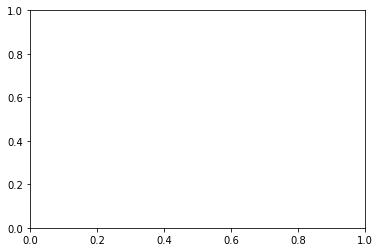

In [124]:
fig = plt.figure()
ax = plt.subplot(111)

In [125]:
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']

In [135]:
weights,params = [],[]

In [136]:
for c in np.arange(-4.,6.):
    lr = LogisticRegression(penalty='l1',C=10.**c,random_state=0)
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

In [137]:
weights = np.array(weights)

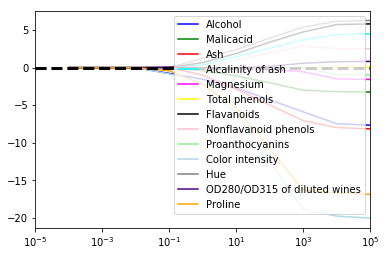

In [150]:
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label = df_wine.columns[column+1],color = color)
plt.axhline(0,color = 'black',linestyle = '--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.xscale('log')
plt.legend(loc='upper right')
ax.legend(loc = 'upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)

## Sequential Feature Selection

In [155]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [196]:
class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features=k_features
        self.test_size = test_size
        self.random_state=random_state
    
 
    def fit(self,x,y):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=self.test_size,random_state=self.random_state)
        dim = x_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(x_train, y_train, 
                                 x_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_,r = dim-1):
                score = self._calc_score(x_train,y_train,x_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            best  = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -=1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self,x):
        return x[:,self.indices_]
    
    def _calc_score(self,x_train,y_train,x_test,y_test,indices):
        self.estimator.fit(x_train[:,indices],y_train)
        y_pred = self.estimator.predict(x_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score
        
      

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(x_train_std,y_train)

<__main__.SBS instance at 0x110140170>

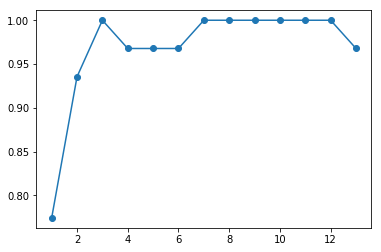

In [202]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')

In [210]:
k3 = list(sbs.subsets_[10])
k3
df_wine.columns[1:][k3]

Index([u'Alcohol', u'Malicacid', u'OD280/OD315 of diluted wines'], dtype='object')

In [211]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [212]:
knn.score(x_train_std,y_train)

0.967741935483871

In [213]:
knn.score(x_test_std,y_test)

0.9814814814814815

In [214]:
knn.fit(x_train_std[:,k3],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [215]:
knn.score(x_train_std[:,k3],y_train)

0.9516129032258065

In [217]:
knn.score(x_test_std[:,k3],y_test)

0.9259259259259259

## Feature Importance

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [226]:
importance = forest.feature_importances_
importance

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [235]:
indices = np.argsort(importance)[::-1]
for f in range(x_train.shape[1]):
    print(feat_labels[indices[f]],importance[indices[f]])

('Proline', 0.18545260453273982)
('Flavanoids', 0.1747509755778874)
('Color intensity', 0.1439199033723142)
('OD280/OD315 of diluted wines', 0.13616194422145594)
('Alcohol', 0.11852941731789321)
('Hue', 0.05873899628096852)
('Total phenols', 0.05087242613744544)
('Magnesium', 0.03135708460816906)
('Malicacid', 0.02564835556426572)
('Proanthocyanins', 0.02556987901932915)
('Alcalinity of ash', 0.02236594193768851)
('Nonflavanoid phenols', 0.013353928195970427)
('Ash', 0.013278543233872918)


([<matplotlib.axis.XTick at 0x10ffe71d0>,
 <a list of 13 Text xticklabel objects>)

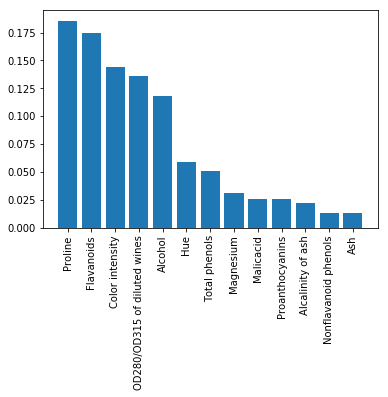

In [239]:
plt.bar(range(x_train.shape[1]),importance[indices])
plt.xticks(range(x_train.shape[1]),feat_labels[indices],rotation=90)

In [240]:
from sklearn.feature_selection import SelectFromModel

In [247]:
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)
x_selected = sfm.transform(x_train)
#Number of criterion which meets threshold
x_selected.shape[1]

5

In [248]:
for f in range(x_selected.shape[1]):
    print(feat_labels[indices[f]],importance[indices[f]])

('Proline', 0.18545260453273982)
('Flavanoids', 0.1747509755778874)
('Color intensity', 0.1439199033723142)
('OD280/OD315 of diluted wines', 0.13616194422145594)
('Alcohol', 0.11852941731789321)
